Block 1: Load and Prepare Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic data
temperature = np.random.uniform(10, 40, n_samples)  # Temperature (°C)
solar_irradiance = np.random.uniform(300, 1000, n_samples)  # Solar Irradiance (W/m²)
wind_speed = np.random.uniform(0, 10, n_samples)  # Wind Speed (m/s)
humidity = np.random.uniform(10, 90, n_samples)  # Humidity (%)

# Define the true relationship between variables and energy output
true_coefficients = [3.2, 0.7, -1.5, -0.3]  # Coefficients for each variable
true_intercept = 50  # Initial bias

# Compute energy output with some noise
noise = np.random.normal(0, 5, n_samples)
energy_output = (
    true_coefficients[0] * temperature +
    true_coefficients[1] * solar_irradiance +
    true_coefficients[2] * wind_speed +
    true_coefficients[3] * humidity +
    true_intercept + noise
)

# Create a DataFrame
data = pd.DataFrame({
    'Temperature': temperature,
    'Solar_Irradiance': solar_irradiance,
    'Wind_Speed': wind_speed,
    'Humidity': humidity,
    'Energy_Output': energy_output
})

# Display the first five rows
print(data.head())

   Temperature  Solar_Irradiance  Wind_Speed   Humidity  Energy_Output
0    21.236204        429.593050    2.617057  63.816240     402.243734
1    38.521429        679.330663    2.469788  73.734512     624.540924
2    31.959818        911.062085    9.062546  30.037432     764.377313
3    27.959755        812.557420    2.495462  59.989928     688.800758
4    14.680559        864.592804    2.719497  55.739679     679.096151


 Block 2: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       1000 non-null   float64
 1   Solar_Irradiance  1000 non-null   float64
 2   Wind_Speed        1000 non-null   float64
 3   Humidity          1000 non-null   float64
 4   Energy_Output     1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None
       Temperature  Solar_Irradiance   Wind_Speed     Humidity  Energy_Output
count  1000.000000       1000.000000  1000.000000  1000.000000    1000.000000
mean     24.707697        654.912114     5.024057    49.230004     565.184458
std       8.764121        204.532925     2.906742    22.919148     147.067174
min      10.138961        302.252785     0.000116    10.052271     262.930925
25%      17.079198        468.751990     2.613510    29.352062     435.956161
50%      24.904221        663.113734     5.006139   

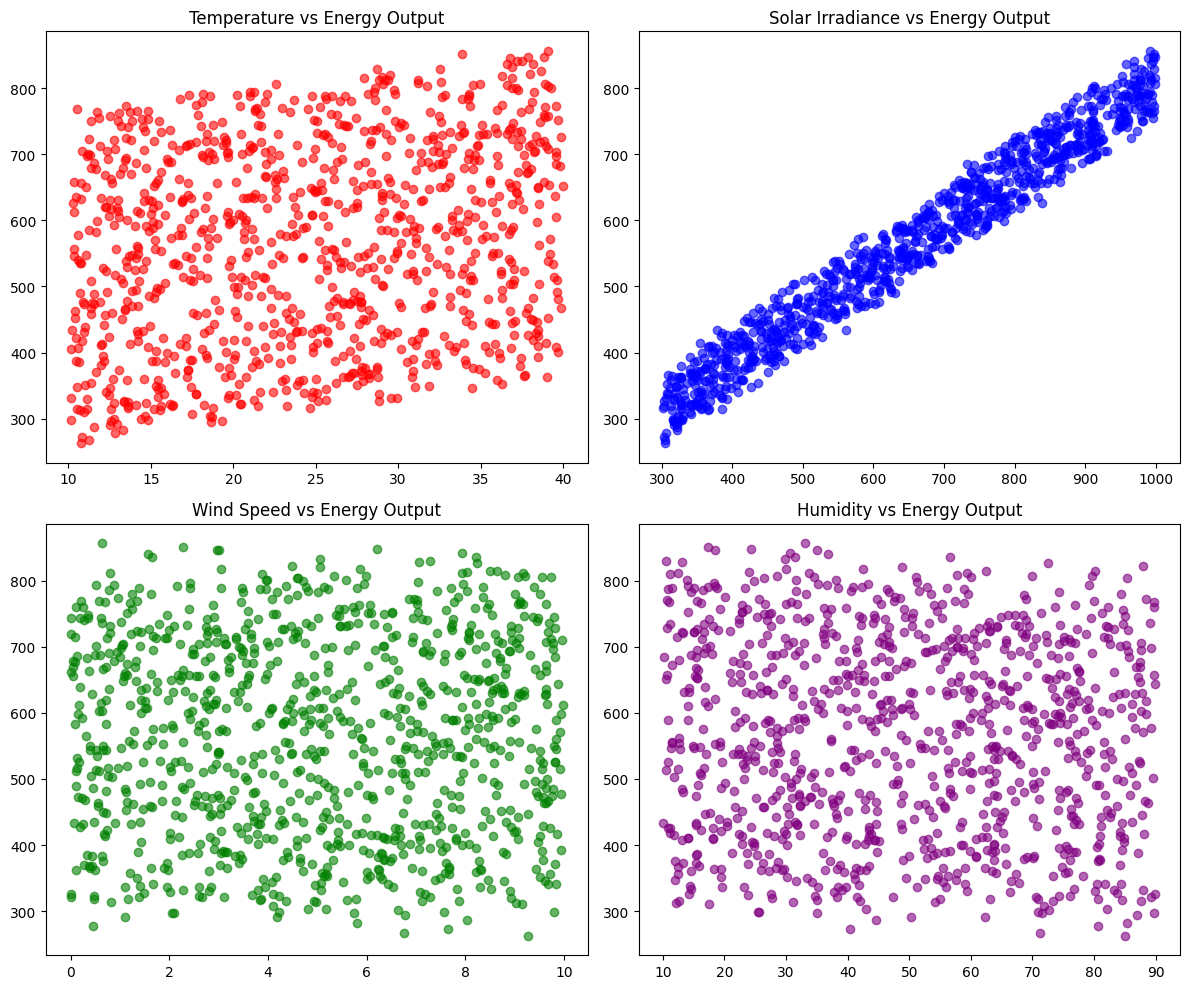

In [2]:
# Display general dataset info
print(data.info())

# Display statistical summary
print(data.describe())

# Scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].scatter(data['Temperature'], data['Energy_Output'], color='red', alpha=0.6)
axes[0, 0].set_title("Temperature vs Energy Output")

axes[0, 1].scatter(data['Solar_Irradiance'], data['Energy_Output'], color='blue', alpha=0.6)
axes[0, 1].set_title("Solar Irradiance vs Energy Output")

axes[1, 0].scatter(data['Wind_Speed'], data['Energy_Output'], color='green', alpha=0.6)
axes[1, 0].set_title("Wind Speed vs Energy Output")

axes[1, 1].scatter(data['Humidity'], data['Energy_Output'], color='purple', alpha=0.6)
axes[1, 1].set_title("Humidity vs Energy Output")

plt.tight_layout()
plt.show()

 Block 3: Splitting the Dataset

In [3]:
# Define input features (X) and target variable (y)
X = data[['Temperature', 'Solar_Irradiance', 'Wind_Speed', 'Humidity']]
y = data['Energy_Output']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed!")

Data preprocessing completed!


Block 4: Implementing Multiple Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = model.predict(X_test_scaled)

# Display model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Intercept: 569.3625134352901
Coefficients: [ 27.9571861  142.97065508  -4.29026093  -7.06731591]
Mean Squared Error (MSE): 26.29
R² Score: 1.00


Block 5: Visualizing Predictions

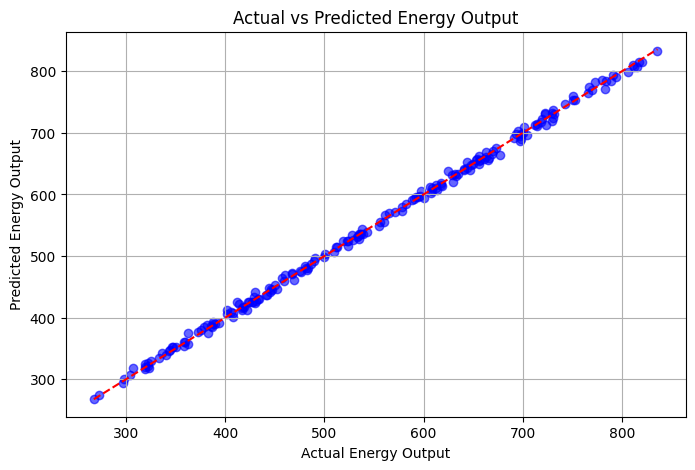

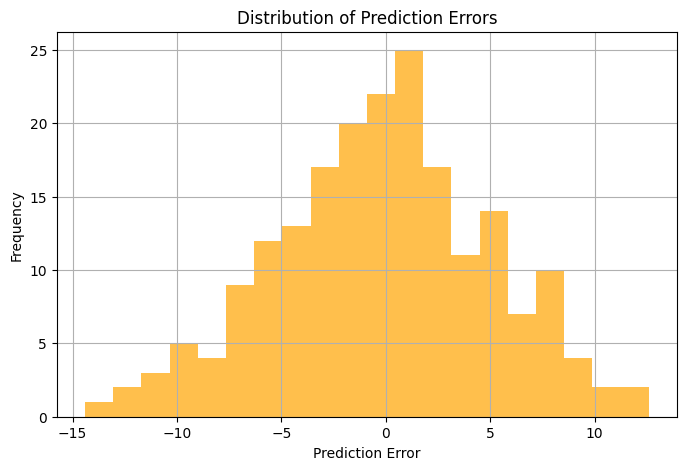

In [5]:
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Energy Output')
plt.ylabel('Predicted Energy Output')
plt.title('Actual vs Predicted Energy Output')
plt.grid(True)
plt.show()

# Plot the distribution of errors
errors = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=20, color='orange', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

Block 6: Making a Prediction

In [6]:
# Example new input data
new_data = np.array([[25, 800, 3, 40]])  # Temperature, Solar Irradiance, Wind Speed, Humidity
new_data_scaled = scaler.transform(new_data)

# Predict energy output
predicted_output = model.predict(new_data_scaled)
print(f"Predicted Energy Output: {predicted_output[0]:.2f} Watts")


Predicted Energy Output: 673.56 Watts


c:\Users\alire\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
